## 1. CNN challenge - Face to Age

### Objectives
-  Visualize images
-  Preprocess images for Neural Networks
-  Fit a custom CNN for a regression task
-  Fine-tune an analyse model performance

### 1.1 Visualize images

**👉 Load the dataset (200 Mo)**

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/images/images.csv')
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data

,age,pixels
0,45,200 168 96 107 123 132 132 135 135 134 134 137...
1,1,223 226 231 234 236 238 238 240 240 240 240 23...
2,35,23 29 24 29 47 71 110 141 166 169 169 174 179 ...
3,28,9 6 11 12 30 65 82 37 47 16 27 26 32 74 141 16...
4,24,67 66 63 59 61 62 60 66 83 103 139 173 192 194...
...,...,...
23700,35,48 47 52 66 78 89 96 104 117 127 139 142 149 1...
23701,55,101 107 110 114 118 120 127 129 132 137 139 14...
23702,28,161 134 113 114 98 93 92 90 82 58 23 45 85 105...
23703,3,65 82 84 129 141 116 43 46 54 71 58 60 64 66 7...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  int64 
 1   pixels  23705 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.5+ KB


In [3]:
centenaires = data[data.age>=100]
centenaires

,age,pixels
664,115,209 209 205 193 191 145 62 51 43 53 71 60 68 5...
1507,105,187 171 158 187 196 198 198 193 175 155 168 19...
1588,100,16 22 29 34 43 56 76 108 135 137 125 127 131 1...
3332,100,116 115 121 107 122 127 100 133 136 142 149 14...
3990,116,207 200 197 181 186 174 184 185 162 164 164 16...
5366,100,203 185 139 163 176 184 186 175 175 156 159 13...
6335,100,235 164 113 144 121 201 243 237 234 221 233 23...
7410,101,222 222 223 222 218 195 130 81 222 241 233 236...
8283,110,38 38 39 38 39 92 12 11 43 52 47 36 19 23 20 2...
8720,100,70 72 94 149 154 166 175 169 172 161 176 187 2...


Each row represent the image of a face in black and white
- `age` is the age in year
- `pixels` contains the 2304 (= 48 * 48) flatten values of each pixel in the image, in a black scale from 0 to 255, stored as string

In [4]:
centenaires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 664 to 22778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     32 non-null     int64 
 1   pixels  32 non-null     object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [5]:
data.loc[0, 'pixels']

'200 168 96 107 123 132 132 135 135 134 134 137 139 140 141 142 143 145 149 153 155 153 149 144 139 124 114 113 111 104 96 93 96 95 91 91 91 86 84 130 173 194 191 194 195 195 193 193 196 154 88 108 126 133 126 132 132 131 131 135 139 143 146 149 150 152 153 155 157 155 151 145 140 131 123 123 120 112 107 104 104 99 90 91 92 83 88 102 158 189 193 193 193 193 193 193 190 135 86 109 122 123 126 132 130 129 129 133 141 148 153 154 156 155 155 152 150 151 151 148 141 137 130 128 123 121 122 117 106 100 91 95 89 86 89 82 134 185 196 191 192 192 193 193 188 117 88 114 124 124 130 129 127 128 126 131 144 154 159 160 163 161 159 153 143 141 145 145 140 141 139 137 134 125 121 116 103 104 100 95 83 87 88 78 118 176 196 191 192 192 193 193 170 108 89 111 120 124 127 124 118 120 126 138 147 155 162 163 161 160 162 155 142 137 139 143 140 141 141 138 135 123 119 116 106 107 104 98 84 86 89 76 106 165 197 191 192 192 193 193 145 99 94 109 114 123 124 122 119 124 140 148 151 153 157 156 151 151 155 1

**❓ Plot the histogram of age in your dataset.**

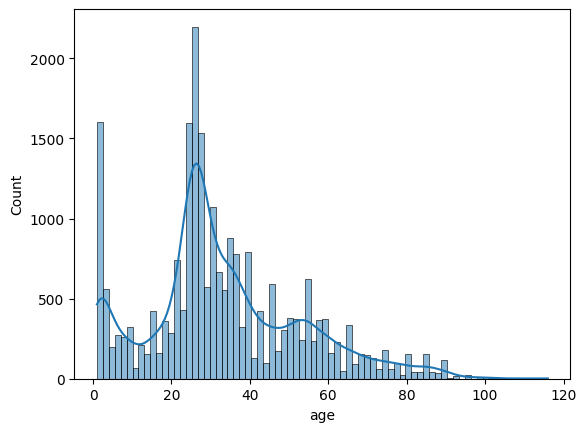

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['age'], kde=True);

In [7]:
def image_def(i):
    image_i = np.fromstring(data.loc[i, 'pixels'], dtype = int, sep=' ').reshape(48, 48, 1)
    return image_i

def image_age(i):
    return data.loc[i, 'age']

**❓ Visually display one image of your choice.**

In [8]:
import random

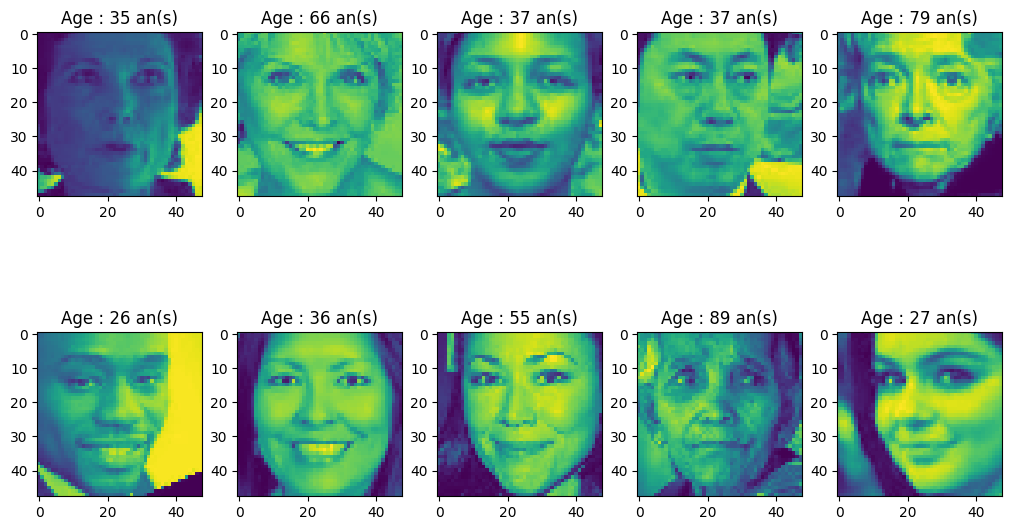

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(10, 6))
gs = fig.add_gridspec(2,5)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
ax6 = fig.add_subplot(gs[1, 0])
ax7 = fig.add_subplot(gs[1, 1])
ax8 = fig.add_subplot(gs[1, 2])
ax9 = fig.add_subplot(gs[1, 3])
ax10 = fig.add_subplot(gs[1, 4])
draws = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
for ax in draws:
    i = random.randint(0, len(data))
    ax.imshow(image_def(i)) # cmap='gray'
    ax.set_title(f'Age : {image_age(i)} an(s)')

In [10]:
image_age(60)

27

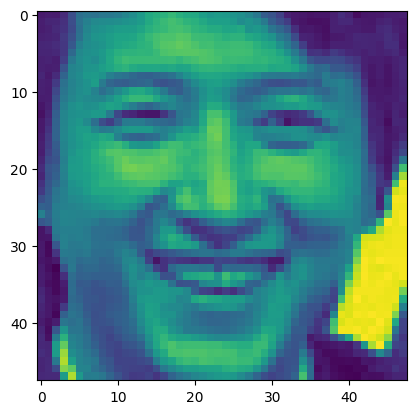

In [11]:
plt.imshow(image_def(60))

**❓ What is the physical characteristic of the image at _index_ `60`?**

- Store in the 3 boolean variables `smile`/`glasses`/`hat` the values `True` if the person smiles/wears glasses/has a hat, `False` else.

In [12]:
# Store your result in the variable below

smile = True
glasses = False
hat = False

### 1.2 Processing

**❓ Your goal is to train a convolutional neural network model to predict the _age_ of a person based solely on a picture of his/her face.**
- Create your **feature matrix** `X` as `ndarray` scaled between 0 and 1
- Create your **target vector** `y` as `ndarray`
- Create your holdout sets: 4 variables (`X_train`, `y_train`) and (`X_test`, `y_test`) keeping the **first** `70%` as the train set
- `X` and `y` shapes should fit a CNN (`model.fit(X,y)`)

😌 Don't worry, you will be given the solution in the next question in case you don't make it

In [13]:
y = np.array(data.age)

In [14]:
y

array([45,  1, 35, ..., 28,  3,  2])

In [15]:
X = np.array([np.array([int(pixel) / 255 for pixel in data.pixels[i].split(' ')]) for i in range(len(data))])
X = X.reshape(23705, 48, 48, 1)
print(X.shape)
X

(23705, 48, 48, 1)


array([[[[0.78431373],
         [0.65882353],
         [0.37647059],
         ...,
         [0.76470588],
         [0.75686275],
         [0.75686275]],

        [[0.76862745],
         [0.60392157],
         [0.34509804],
         ...,
         [0.75686275],
         [0.75686275],
         [0.75686275]],

        [[0.74509804],
         [0.52941176],
         [0.3372549 ],
         ...,
         [0.75294118],
         [0.75686275],
         [0.75686275]],

        ...,

        [[0.76078431],
         [0.77647059],
         [0.76862745],
         ...,
         [0.40392157],
         [0.4       ],
         [0.41176471]],

        [[0.78039216],
         [0.78431373],
         [0.79215686],
         ...,
         [0.4       ],
         [0.40784314],
         [0.41176471]],

        [[0.78431373],
         [0.78431373],
         [0.77254902],
         ...,
         [0.39607843],
         [0.40392157],
         [0.40784314]]],


       [[[0.8745098 ],
         [0.88627451],
         [0.90

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### 1.3 Modeling the age of a face

In [17]:
print(X_train.shape)
print(X_test.shape)

(16593, 48, 48, 1)
(7112, 48, 48, 1)


In [18]:
print(y_train.shape)
print(y_train)

(16593,)
[55  3 29 ... 25 26 54]


❓ **Before training a complex model, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "naive" case where you always predict mean age
- Store the result under `score_baseline`

In [19]:
mean_age = y_test.mean()
mean_age

33.02123172103487

In [20]:
score_baseline = (abs(y_test-mean_age)).sum()/len(y_test)
score_baseline

15.411346623713653

❓ **Build and fit a convolutional neural network**

- Name it `model`
- Store output of `.fit()` in a variable `history`
- Do not use transfer learning
- Make sure your model does not overfit with appropriate control techniques

💡 Manage wisely your training time. You should obtain significantly better performance than the baseline in less than 5 minutes with average processor and no graphic cards. 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), 
                 padding='same',
                 strides = (1,1),
                 input_shape=(48, 48, 1), 
                 activation='relu'))
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation="relu",
                 padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        8224      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 40)                327720    
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                        

In [23]:
model.compile(loss='mse', optimizer='adam', metrics='MAE')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping 
es = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    epochs=200,
                    batch_size=8,
                    validation_split=0.3,
                    callbacks=[es],
                    verbose=1)

Epoch 1/200


2023-03-28 12:11:31.674341: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1452/1452 [==============================] - 15s 10ms/step - loss: 290.4446 - MAE: 12.9707 - val_loss: 235.9621 - val_MAE: 11.4886
Epoch 2/200
1452/1452 [==============================] - 15s 10ms/step - loss: 180.0309 - MAE: 10.1497 - val_loss: 153.5447 - val_MAE: 9.2942
Epoch 3/200
1452/1452 [==============================] - 17s 12ms/step - loss: 138.6716 - MAE: 8.7942 - val_loss: 145.3091 - val_MAE: 8.7520
Epoch 4/200
1452/1452 [==============================] - 16s 11ms/step - loss: 116.6329 - MAE: 7.9844 - val_loss: 121.9841 - val_MAE: 8.3267
Epoch 5/200
1452/1452 [==============================] - 16s 11ms/step - loss: 101.2270 - MAE: 7.4466 - val_loss: 126.7135 - val_MAE: 8.0909
Epoch 6/200
1452/1452 [==============================] - 16s 11ms/step - loss: 89.9165 - MAE: 7.0289 - val_loss: 103.2619 - val_MAE: 7.4440
Epoch 7/200
1452/1452 [==============================] - 16s 11ms/step - loss: 81.1003 - MAE: 6.6911 - val_loss: 102.9837 - val_MAE: 7.4499
Epoch 8/200
1452/1452 [=

❓ **Plot your training and validation MAE at each epoch using the cell below**

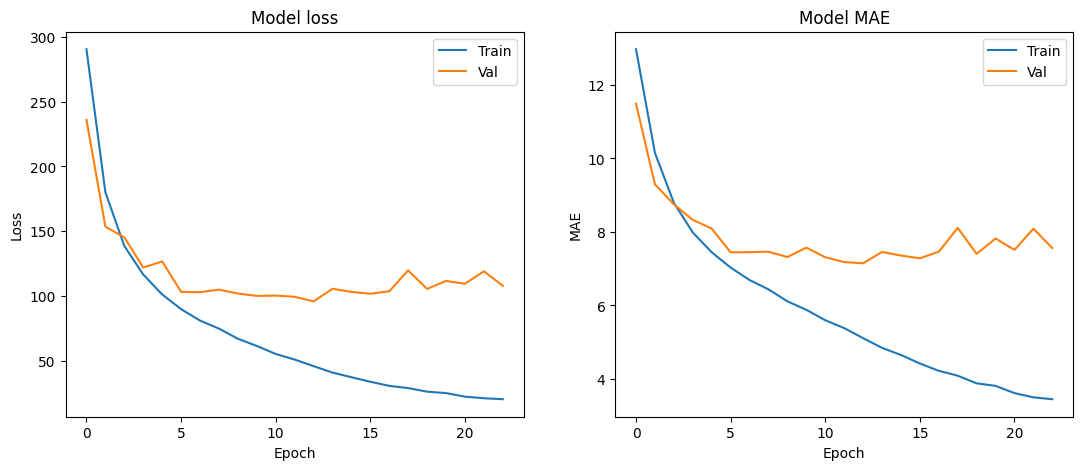

In [25]:
# Plot below your train/val loss history
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='best')
ax[1].plot(history.history['MAE'])
ax[1].plot(history.history['val_MAE'])
ax[1].set_title('Model MAE')
ax[1].set_ylabel('MAE')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='best')
# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig.savefig("history_cnn.png")

❓ **Evaluate your performances on test set**
- Store your test score as `score_test`

In [26]:
score_test = model.evaluate(X_test, y_test)[1]
score_test

223/223 [==============================] - 2s 8ms/step - loss: 90.5266 - MAE: 6.8612


6.861222267150879

In [27]:
def image_draw(i):
    return plt.imshow(X_test[i]*255, cmap='gray')
def image_age(i):
    return y_test[i]
def image_predict(i):
    return model.predict(X_test)[i][0]
def image_test(i):
    image_draw(i)
    print(f'Age réel : {image_age(i)}')
    print(f'Age prédit : {image_predict(i)}')

Age réel : 26
223/223 [==============================] - 2s 8ms/step
Age prédit : 28.241243362426758


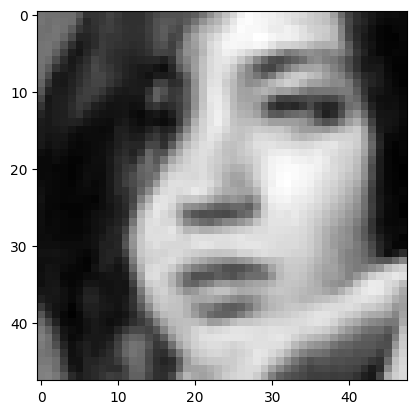

In [28]:
n = random.randint(0, len(y_test))
image_test(n)

In [29]:
X0 = np.load('data/photos_normees/Louis59_np.npy')
y0 = 59

Age réel : 59
1/1 [==============================] - 0s 9ms/step
Age prédit : 43.48662567138672


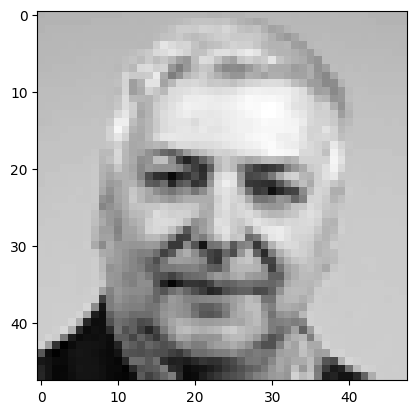

In [30]:
X1 = X0 / 255
X1 = X1.reshape(1,48,48,1)
plt.imshow(X0, cmap="gray")
print(f'Age réel : {y0}')
print(f'Age prédit : {model.predict(X1)[0][0]}')